# **INFO5731 Assignment 3**

In this assignment, we will delve into various aspects of natural language processing (NLP) and text analysis. The tasks are designed to deepen your understanding of key NLP concepts and techniques, as well as to provide hands-on experience with practical applications.

Through these tasks, you'll gain practical experience in NLP techniques such as N-gram analysis, TF-IDF, word embedding model creation, and sentiment analysis dataset creation.

**Expectations**:
*   Use the provided .*ipynb* document to write your code & respond to the questions. Avoid generating a new file.
*   Write complete answers and run all the cells before submission.
*   Make sure the submission is "clean"; *i.e.*, no unnecessary code cells.
*   Once finished, allow shared rights from top right corner (*see Canvas for details*).


**Total points**: 100

**Deadline**: See Canvas

**Late Submission will have a penalty of 10% reduction for each day after the deadline.**


## Question 1 (30 points)

**Understand N-gram**

Write a python program to conduct N-gram analysis based on the dataset in your assignment two. You need to write codes from scratch instead of using any pre-existing libraries to do so:

(1) Count the frequency of all the N-grams (N=3).

(2) Calculate the probabilities for all the bigrams in the dataset by using the fomular count(w2 w1) / count(w2). For example, count(really like) / count(really) = 1 / 3 = 0.33.

(3) Extract all the noun phrases and calculate the relative probabilities of each review in terms of other reviews (abstracts, or tweets) by using the fomular frequency (noun phrase) / max frequency (noun phrase) on the whole dataset. Print out the result in a table with column name the all the noun phrases and row name as all the 100 reviews (abstracts, or tweets).

In [ ]:
# Write your code here
import csv
import re
from collections import Counter

def preprocess(text):
    text = text.lower()
    text = re.sub(r'[^\w\s]', '', text)
    return text.split()

def ngrams(tokens, n):
    return [" ".join(tokens[i:i+n]) for i in range(len(tokens)-n+1)]

def calculate_bigram_prob(tokens):
    bigrams = ngrams(tokens, 2)
    bigram_counts = Counter(bigrams)
    unigram_counts = Counter(tokens)
    bigram_probs = {}
    for bigram, count in bigram_counts.items():
        word1, word2 = bigram.split()
        bigram_probs[bigram] = count / unigram_counts[word1]
    return bigram_probs

def extract_noun_phrases(tokens):
    skip_words = {'a', 'an', 'the', 'and', 'or', 'but'}
    noun_phrases = []
    current_phrase = []
    for word in tokens:
        if word in skip_words:
            if current_phrase:
                noun_phrases.append(" ".join(current_phrase))
                current_phrase = []
        elif word.isalpha():
            current_phrase.append(word)
    if current_phrase:
        noun_phrases.append(" ".join(current_phrase))
    return noun_phrases

def relative_probabilities(reviews):
    all_noun_phrases = []
    for review in reviews:
        tokens = preprocess(review)
        noun_phrases = extract_noun_phrases(tokens)
        all_noun_phrases.extend(noun_phrases)
    max_phrase_counts = Counter(all_noun_phrases)
    rel_probs = {}
    for review in reviews:
        tokens = preprocess(review)
        noun_phrases = extract_noun_phrases(tokens)
        max_freq = max(max_phrase_counts[noun] for noun in noun_phrases)
        rel_probs[review] = {noun: max_phrase_counts[noun] / max_freq for noun in noun_phrases}
    return rel_probs

def main():
    reviews = []
    with open('product_reviews.csv', newline='', encoding='utf-8') as csvfile:
        reader = csv.DictReader(csvfile)
        for row in reader:
            reviews.append(row['Review'])

    ngram_counts = Counter()
    for review in reviews:
        tokens = preprocess(review)
        ngrams_list = ngrams(tokens, 3)
        ngram_counts.update(ngrams_list)

    bigram_probs = {}
    for review in reviews:
        tokens = preprocess(review)
        bigram_probs.update(calculate_bigram_prob(tokens))

    rel_probs = relative_probabilities(reviews)

    print("N-gram Frequencies (N=3):")
    print(ngram_counts)
    print("\nBigram Probabilities:")
    print(bigram_probs)
    print("\nRelative Probabilities of Noun Phrases:")
    for review, probs in rel_probs.items():
        print(f"\nReview {review}:")
        for noun, prob in probs.items():
            print(f"{noun}: {prob}")

if __name__ == "__main__":
    main()






N-gram Frequencies (N=3):
Counter({'a couple of': 246, 'and you can': 231, 'fun to play': 231, 'to play with': 231, 'i got the': 231, 'got the disco': 231, 'the disco plaid': 231, 'a fidget toy': 169, 'the cube is': 154, 'more than one': 154, 'seem to be': 154, 'the sweet spot': 154, 'of this product': 154, 'it is a': 154, 'to it i': 154, 'play with and': 154, 'played with it': 154, 'the different shapes': 154, 'one of these': 154, 'color variation between': 154, 'variation between the': 154, 'with it it': 154, 'several of the': 154, 'of these before': 154, 'down from muscle': 154, 'from muscle memory': 154, 'freaking out and': 154, 'i have been': 154, 'my fidget and': 154, 'get rid of': 154, 'other than a': 124, 'fidget toy and': 92, 'love it expands': 77, 'it expands the': 77, 'expands the mind': 77, 'the mind for': 77, 'mind for kids': 77, 'for kids and': 77, 'kids and adults': 77, 'and adults love': 77, 'adults love all': 77, 'love all of': 77, 'all of it': 77, 'of it colors': 77, 

## Question 2 (25 points)

**Undersand TF-IDF and Document representation**

Starting from the documents (all the reviews, or abstracts, or tweets) collected for assignment two, write a python program:

(1) To build the documents-terms weights (tf * idf) matrix.

(2) To rank the documents with respect to query (design a query by yourself, for example, "An Outstanding movie with a haunting performance and best character development") by using cosine similarity.

Note: You need to write codes from scratch instead of using any pre-existing libraries to do so.

In [ ]:
# Write your code here
import csv
import re
import math

def preprocess(text):
    text = text.lower()
    text = re.sub(r'[^\w\s]', '', text)
    return text.split()

def term_frequency(tokens):
    total_tokens = len(tokens)
    tf_counts = {}
    for token in tokens:
        tf_counts[token] = tf_counts.get(token, 0) + 1 / total_tokens
    return tf_counts

def inverse_document_frequency(documents, term):
    total_docs = len(documents)
    doc_with_term = sum(1 for doc in documents if term in doc)
    return math.log10(total_docs / (1 + doc_with_term))

def tfidf_weights(documents):
    tfidf_weights = []
    for doc in documents:
        tokens = preprocess(doc)
        tf = term_frequency(tokens)
        tfidf = {}
        for token, tf_value in tf.items():
            idf = inverse_document_frequency(documents, token)
            tfidf[token] = tf_value * idf
        tfidf_weights.append(tfidf)
    return tfidf_weights

def cosine_similarity(doc1, doc2):
    dot_product = sum(doc1.get(term, 0) * doc2.get(term, 0) for term in set(doc1) & set(doc2))
    magnitude_doc1 = math.sqrt(sum(value ** 2 for value in doc1.values()))
    magnitude_doc2 = math.sqrt(sum(value ** 2 for value in doc2.values()))
    if magnitude_doc1 == 0 or magnitude_doc2 == 0:
        return 0
    return dot_product / (magnitude_doc1 * magnitude_doc2)

def rank_documents(query, documents):
    query_tokens = preprocess(query)
    query_tf = term_frequency(query_tokens)
    query_tfidf = {}
    for token, tf_value in query_tf.items():
        idf = inverse_document_frequency(documents, token)
        query_tfidf[token] = tf_value * idf

    doc_tfidf_weights = tfidf_weights(documents)

    document_scores = []
    for i, doc_tfidf in enumerate(doc_tfidf_weights):
        similarity = cosine_similarity(query_tfidf, doc_tfidf)
        document_scores.append((i+1, similarity))

    document_scores.sort(key=lambda x: x[1], reverse=True)
    return document_scores

def main():
    query = "An amazing product, very useful"

    documents = []
    with open('product_reviews.csv', newline='', encoding='utf-8') as csvfile:
        reader = csv.DictReader(csvfile)
        for row in reader:
            documents.append(row['Review'])

    ranked_documents = rank_documents(query, documents)

    print("Ranked Documents:")
    for rank, (doc_index, score) in enumerate(ranked_documents, start=1):
        print(f"Rank {rank}: Document {doc_index} - Similarity Score: {score}")

if __name__ == "__main__":
    main()







Ranked Documents:
Rank 1: Document 2 - Similarity Score: 0.020139734090955236
Rank 2: Document 15 - Similarity Score: 0.020139734090955236
Rank 3: Document 28 - Similarity Score: 0.020139734090955236
Rank 4: Document 41 - Similarity Score: 0.020139734090955236
Rank 5: Document 54 - Similarity Score: 0.020139734090955236
Rank 6: Document 67 - Similarity Score: 0.020139734090955236
Rank 7: Document 80 - Similarity Score: 0.020139734090955236
Rank 8: Document 93 - Similarity Score: 0.020139734090955236
Rank 9: Document 106 - Similarity Score: 0.020139734090955236
Rank 10: Document 119 - Similarity Score: 0.020139734090955236
Rank 11: Document 132 - Similarity Score: 0.020139734090955236
Rank 12: Document 145 - Similarity Score: 0.020139734090955236
Rank 13: Document 158 - Similarity Score: 0.020139734090955236
Rank 14: Document 171 - Similarity Score: 0.020139734090955236
Rank 15: Document 184 - Similarity Score: 0.020139734090955236
Rank 16: Document 197 - Similarity Score: 0.02013973409

## Question 3 (25 points)

**Create your own word embedding model**

Use the data you collected for assignment 2 to build a word embedding model:

(1) Train a 300-dimension word embedding (it can be word2vec, glove, ulmfit, bert, or others).

(2) Visualize the word embedding model you created.

Reference: https://machinelearningmastery.com/develop-word-embeddings-python-gensim/

Reference: https://jaketae.github.io/study/word2vec/

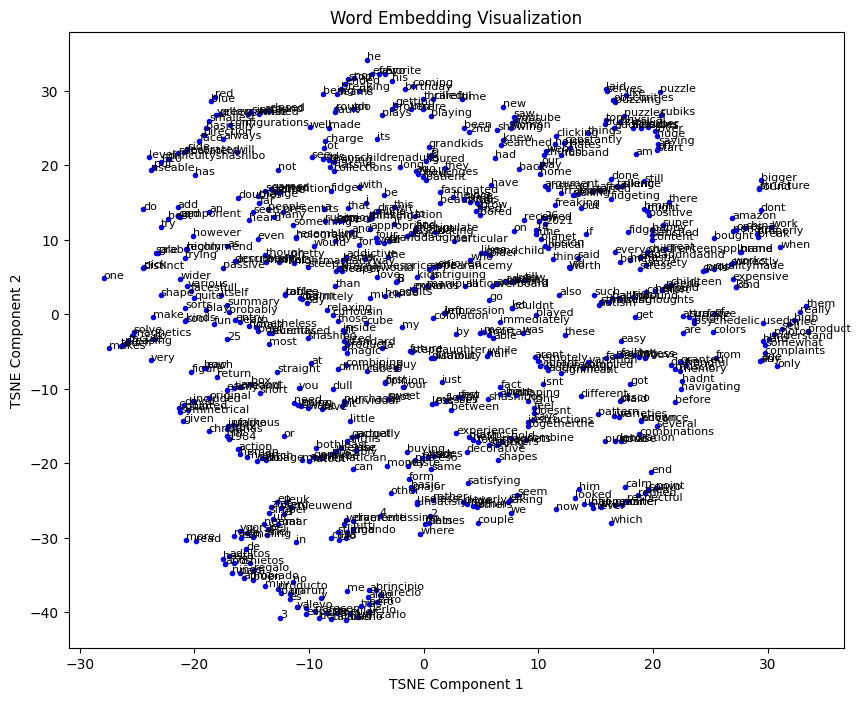

In [ ]:
import csv
import re
from gensim.models import Word2Vec
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt

def clean_text(text):
    text = text.lower()
    text = re.sub(r'[^\w\s]', '', text)
    return text.split()

def load_data(file_path):
    data = []
    with open(file_path, newline='', encoding='utf-8') as csvfile:
        reader = csv.DictReader(csvfile)
        for row in reader:
            data.append(clean_text(row['Review']))
    return data

def train_word_embedding(data):
    model = Word2Vec(sentences=data, vector_size=300, window=5, min_count=1, sg=1, negative=5, epochs=10)
    return model

def visualize_embeddings(word_embedding_model):
    words = list(word_embedding_model.wv.index_to_key)
    vectors = word_embedding_model.wv[words]

    tsne = TSNE(n_components=2, random_state=42)
    vectors_2d = tsne.fit_transform(vectors)

    plt.figure(figsize=(10, 8))
    plt.scatter(vectors_2d[:, 0], vectors_2d[:, 1], marker='.', color='b')

    for i, word in enumerate(words):
        plt.annotate(word, xy=(vectors_2d[i, 0], vectors_2d[i, 1]), fontsize=8)

    plt.xlabel('TSNE Component 1')
    plt.ylabel('TSNE Component 2')
    plt.title('Word Embedding Visualization')
    plt.show()

# Load data from CSV file
file_path = 'product_reviews.csv'
data = load_data(file_path)

# Train Word2Vec model
word_embedding_model = train_word_embedding(data)

# Visualize word embeddings
visualize_embeddings(word_embedding_model)


## Question 4 (20 Points)

**Create your own training and evaluation data for sentiment analysis.**

 **You don't need to write program for this question!**

 For example, if you collected a movie review or a product review data, then you can do the following steps:

*   Read each review (abstract or tweet) you collected in detail, and annotate each review with a sentiment (positive, negative, or neutral).

*   Save the annotated dataset into a csv file with three columns (first column: document_id, clean_text, sentiment), upload the csv file to GitHub and submit the file link blew.

*   This datset will be used for assignment four: sentiment analysis and text classification.


In [ ]:
# The GitHub link of your final csv file


# Link:https://github.com/aksh1226/INFO5731/blob/main/reviews_with_neutral.csv



# Mandatory Question

Provide your thoughts on the assignment. What did you find challenging, and what aspects did you enjoy? Your opinion on the provided time to complete the assignment.

In [ ]:
# Type your answer
'''The assignment was both challenging and interesting. It was tough to do some tasks from scratch, like analyzing
text without using ready-made tools. Also, training a word model from the beginning was hard. But it was enjoyable
 because I got to use what I learned in class on real data. Visualizing word patterns and studying text was fun and helped me understand the data better.

The time given to finish the assignment was okay. It let me work on each part well. But more time could've let me
explore advanced techniques. Overall, it was a good learning experience in natural language processing and machine learning.'''